In [1]:
!git clone https://github.com/cbtn-data-science-ml/ml_datasets.git

fatal: destination path 'ml_datasets' already exists and is not an empty directory.


In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [7]:
%pwd

'/Users/barrios/Desktop/GitHub/tensorflow-professional-developer/09_participate_kaggle_competition/ml_datasets'

In [8]:
base_dir = 'cats_vs_dogs/'

In [9]:
os.chdir('ml_datasets')

FileNotFoundError: [Errno 2] No such file or directory: 'ml_datasets'

In [11]:
%pwd

'/Users/barrios/Desktop/GitHub/tensorflow-professional-developer/09_participate_kaggle_competition/ml_datasets'

In [12]:
%ls

README.md          food_10/           waffles_or_nachos/
cats_vs_dogs/      ramen_sushi/


In [13]:
%pwd

'/Users/barrios/Desktop/GitHub/tensorflow-professional-developer/09_participate_kaggle_competition/ml_datasets'

In [14]:
train_path = os.path.join(base_dir, 'train')

In [15]:
test_path = os.path.join(base_dir, 'test')

In [16]:
train_path

'cats_vs_dogs/train'

In [17]:
test_path

'cats_vs_dogs/test'

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
) # data_augmentation

test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [30]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [31]:
# Custom Class Improve Performace
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.8):
            print('\nAccuracy is at or above 80%: STOPPING')
            self.model.stop_training = True

callbacks = MyCallback()

In [32]:
# Define Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
# Compile Model
model.compile(optimizer=RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
# Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator, callbacks=[callbacks])  


model.summary()

Epoch 1/10


2024-06-06 10:24:53.545568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-06-06 10:24:53.548863: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5586

2024-06-06 10:26:08.128264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


625/625 [==============================] - 81s 129ms/step - loss: 0.6925 - accuracy: 0.5586 - val_loss: 0.6260 - val_accuracy: 0.6588
Epoch 2/10
625/625 [==============================] - 83s 133ms/step - loss: 0.6406 - accuracy: 0.6443 - val_loss: 0.5849 - val_accuracy: 0.6976
Epoch 3/10
625/625 [==============================] - 84s 134ms/step - loss: 0.6247 - accuracy: 0.6629 - val_loss: 0.5921 - val_accuracy: 0.6994
Epoch 4/10
625/625 [==============================] - 89s 142ms/step - loss: 0.6083 - accuracy: 0.6773 - val_loss: 0.6138 - val_accuracy: 0.6820
Epoch 5/10
625/625 [==============================] - 86s 137ms/step - loss: 0.5927 - accuracy: 0.6826 - val_loss: 0.5390 - val_accuracy: 0.7426
Epoch 6/10
625/625 [==============================] - 83s 133ms/step - loss: 0.5858 - accuracy: 0.6941 - val_loss: 0.5365 - val_accuracy: 0.7338
Epoch 7/10
625/625 [==============================] - 85s 136ms/step - loss: 0.5799 - accuracy: 0.7010 - val_loss: 0.5422 - val_accuracy: 0.7

<Axes: >

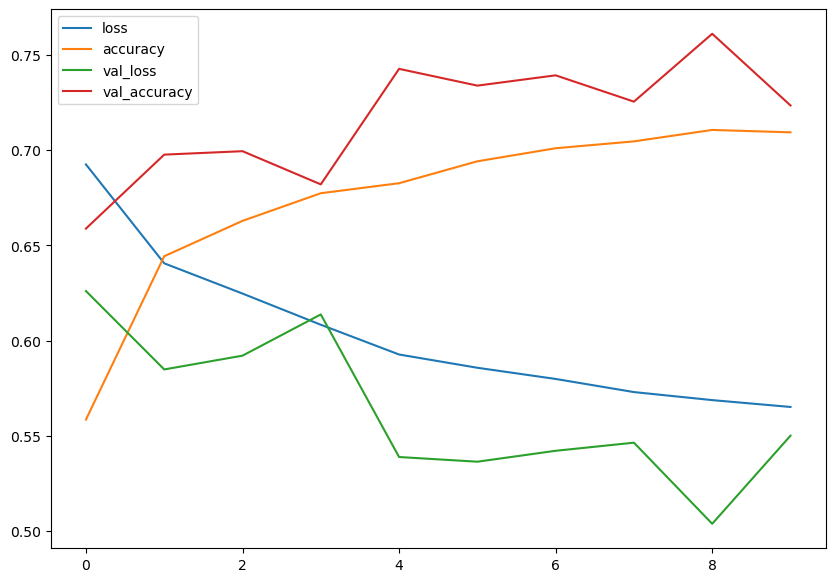

In [35]:
# Plot Loss and Accuracy Curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7))

In [ ]:
# > 75% Val_Accuracy amd NOT overfitting